**DATASET ORIGINALLY TAKEN FROM KAGGLE : https://www.kaggle.com/saisaathvik/used-bikes-prices-in-india**

## IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Used_Bikes.csv')
df.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha


In [3]:
df.shape

(32648, 8)

In [4]:
df.describe()

,price,kms_driven,age,power
count,3.264800e+04,32648.000000,32648.000000,32648.000000
mean,6.829542e+04,26344.625184,8.048211,213.511302
std,9.071860e+04,22208.527695,4.031700,134.428868
min,4.400000e+03,1.000000,1.000000,100.000000
25%,2.500000e+04,12000.000000,5.000000,150.000000
50%,4.300000e+04,20373.000000,7.000000,150.000000
75%,8.000000e+04,35000.000000,10.000000,220.000000
max,1.900000e+06,750000.000000,63.000000,1800.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32648 entries, 0 to 32647
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_name   32648 non-null  object 
 1   price       32648 non-null  float64
 2   city        32648 non-null  object 
 3   kms_driven  32648 non-null  float64
 4   owner       32648 non-null  object 
 5   age         32648 non-null  float64
 6   power       32648 non-null  float64
 7   brand       32648 non-null  object 
dtypes: float64(4), object(4)
memory usage: 2.0+ MB


In [6]:
df.isna().sum()

bike_name     0
price         0
city          0
kms_driven    0
owner         0
age           0
power         0
brand         0
dtype: int64

**NO NULL VALUES IN OUR DATASET**

***Since first column is same as Last column, We can drop first column***

In [7]:
df.drop('bike_name',axis=1,inplace=True)

In [8]:
df_new  = df.copy() 

In [9]:
df.brand.value_counts()

Bajaj              11213
Hero                6368
Royal Enfield       4178
Yamaha              3916
Honda               2108
Suzuki              1464
TVS                 1247
KTM                 1077
Harley-Davidson      737
Kawasaki              79
Hyosung               64
Benelli               56
Mahindra              55
Triumph               26
Ducati                22
BMW                   16
Jawa                  10
MV                     4
Indian                 3
Ideal                  2
LML                    1
Yezdi                  1
Rajdoot                1
Name: brand, dtype: int64

**REPLACING ALL THE BRANDS HAVING VALUE COUNTS LESS THAN 1000 TO 'OTHERS'**

In [10]:
x = df_new['brand'].value_counts().loc[lambda x: x < 1000]

In [11]:
df_new['brand'].replace(x.keys(),'Others',inplace=True)

In [12]:
df_new.brand.value_counts()

Bajaj            11213
Hero              6368
Royal Enfield     4178
Yamaha            3916
Honda             2108
Suzuki            1464
TVS               1247
Others            1077
KTM               1077
Name: brand, dtype: int64

**ANALYSING CITY COLUMN**

In [13]:
df_new['city'].value_counts()

Delhi          7318
Bangalore      2723
Mumbai         2591
Hyderabad      2160
Pune           1724
               ... 
Chikamaglur       1
Shimla            1
Chhindwara        1
Rajahmundry       1
Bhubaneswar       1
Name: city, Length: 443, dtype: int64

**REPLACING ALL THE CITIES HAVING VALUE COUNTS LESS THAN 500 TO 'OTHERS'**

In [14]:
x = df_new['city'].value_counts().loc[lambda x: x < 500]

In [15]:
df_new['city'].replace(x.keys(),'Others',inplace=True)

In [16]:
df_new.city.value_counts()

Delhi                  7318
Bangalore              2723
Mumbai                 2591
Hyderabad              2160
Others                 2098
Pune                   1724
Chennai                1619
Lucknow                1294
Jaipur                 1007
Ghaziabad               938
Ahmedabad               905
Noida                   776
Bhopal                  651
Gautam Buddha Nagar     649
Kanchipuram             640
Jodhpur                 635
Karnal                  625
Allahabad               621
Rupnagar                621
Gurgaon                 617
Godhara                 611
Faridabad               609
Kadapa                  608
Perumbavoor             608
Name: city, dtype: int64

In [17]:
df_new['owner'].value_counts()

First Owner             29964
Second Owner             2564
Third Owner               108
Fourth Owner Or More       12
Name: owner, dtype: int64

**REPLACING ALL THE SECOND, THIRD, FOURTH AND MORE OWNERS TO 'SECOND OWNER OR MORE'**

In [18]:
df_new['owner'].replace(['Second Owner','Third Owner','Fourth Owner Or More'],'Second Owner or more',inplace=True)
df_new['owner'].value_counts()

First Owner             29964
Second Owner or more     2684
Name: owner, dtype: int64

## TREATING OUTLIERS

In [19]:
len(df_new[df_new['price'] > df_new['price'].quantile(0.99)])

177

In [20]:
len(df_new[df_new['power'] > df_new['power'].quantile(0.99)])

131

In [21]:
len(df_new[df_new['kms_driven'] > df_new['kms_driven'].quantile(0.99)])

127

In [22]:
len(df_new[df_new['age'] > df_new['age'].quantile(0.99)])

46

**Since the no. of datapoints above 99% quantile is few in number, therefore we can drop them**

In [23]:
df_new = df_new[-(df_new.price > df_new.price.quantile(0.99))]

In [24]:
df_new = df_new[-(df_new.power > df_new.power.quantile(0.99))]

In [25]:
df_new = df_new[-(df_new.kms_driven > df_new.kms_driven.quantile(0.99))]

In [26]:
df_new = df_new[-(df_new.age > df_new.age.quantile(0.99))]

In [27]:
print('therefore total number of dropped rows is : ',len(df) - len(df_new))

therefore total number of dropped rows is :  356


## EDA

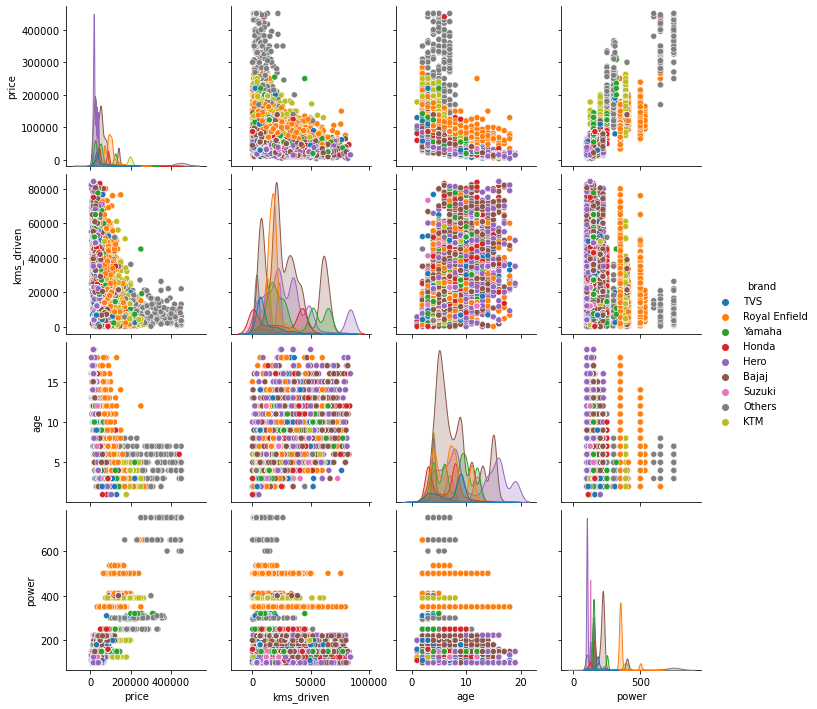

In [28]:
sns.pairplot(df_new,hue='brand')

**From the Pairplot we can conclude that there is some positive relation between price and power , and a negative relationship between price and age, and price and kms_driven**

In [29]:
sns.set_style('darkgrid')

<AxesSubplot:>

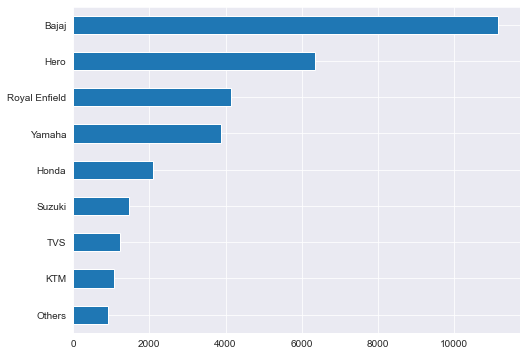

In [30]:
plt.figure(figsize=(8,6))
df_new['brand'].value_counts().sort_values().plot(kind="barh")

<AxesSubplot:ylabel='brand'>

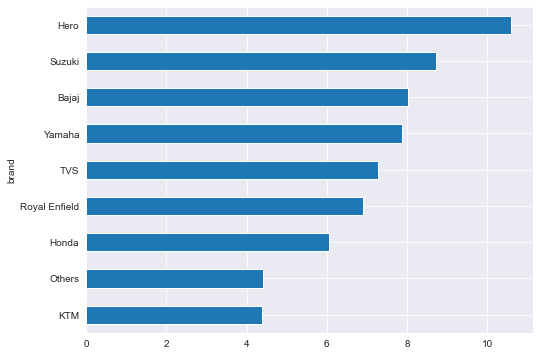

In [31]:
plt.figure(figsize=(8,6))
df_new.groupby('brand')['age'].mean().sort_values().plot(kind="barh")

<AxesSubplot:ylabel='brand'>

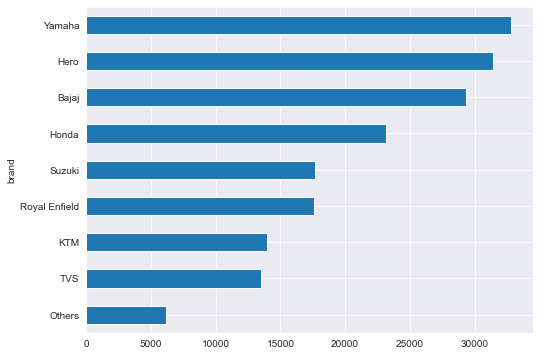

In [32]:
plt.figure(figsize=(8,6))
df_new.groupby('brand')['kms_driven'].mean().sort_values().plot(kind="barh")

<AxesSubplot:ylabel='brand'>

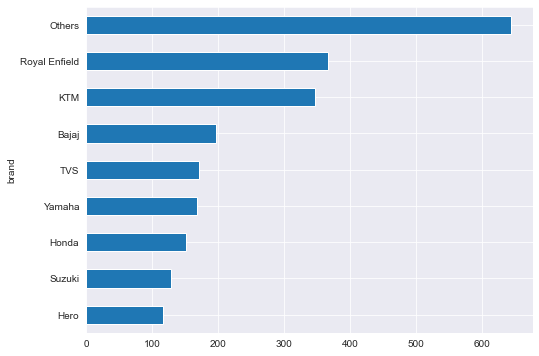

In [33]:
plt.figure(figsize=(8,6))
df_new.groupby('brand')['power'].mean().sort_values().plot(kind="barh")

<AxesSubplot:>

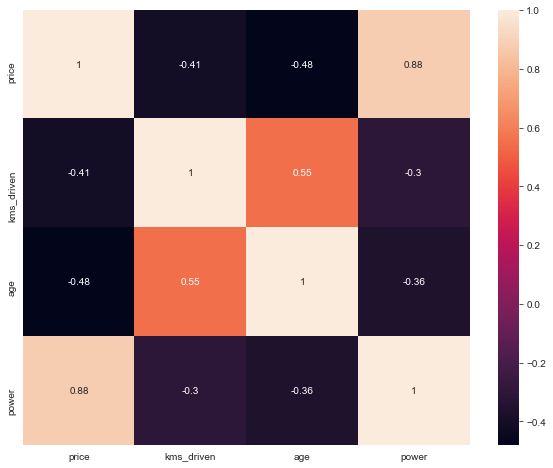

In [34]:
plt.figure(figsize=(10,8))
sns.heatmap(df_new.corr(),annot=True)

**From the Heatmap it can be easily concluded that Power and Price are highly positively correlated**

## TURNING CATEGORIES INTO INTEGERS

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
le = LabelEncoder()

In [37]:
df_new.head()

,price,city,kms_driven,owner,age,power,brand
0,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
3,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha
5,53499.0,Delhi,25000.0,First Owner,6.0,150.0,Yamaha


In [38]:
for i in df_new.columns:
    df_new[i] = le.fit_transform(df_new[i])

In [39]:
df_new.head()

,price,city,kms_driven,owner,age,power,brand
0,243,0,1616,0,2,1,7
1,832,5,902,0,3,17,5
3,498,2,1474,0,3,7,7
4,592,2,802,0,2,5,8
5,414,5,2320,0,5,5,8


## TRAIN TEST SPLIT

In [40]:
X = df_new.drop('price',axis=1)
y = df_new.price

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [43]:
X.shape , y.shape

((32292, 6), (32292,))

# LINEAR REGRESSION

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
lr = LinearRegression()

In [46]:
lr.fit(X_test,y_test)

LinearRegression()

In [47]:
from sklearn.metrics import mean_squared_error,r2_score

In [48]:
lr.score(X_test,y_test)

0.8841710743970207

In [49]:
y_pred = lr.predict(X_test)

In [50]:
mse = mean_squared_error(y_test,y_pred)
print('The Mean Squared error is : ', mse)
print('The Root Mean Squared error is : ', np.sqrt(mse))
print('The R2 Score is : ', r2_score(y_test,y_pred))

The Mean Squared error is :  10280.602279412053
The Root Mean Squared error is :  101.39330490427882
The R2 Score is :  0.8841710743970207


In [51]:
r2_lr = r2_score(y_test,y_pred)

# KNN REGRESSOR

### SCALING FOR KNN

In [52]:
from sklearn.preprocessing import MinMaxScaler

In [53]:
scaler = MinMaxScaler()

In [54]:
X1 = scaler.fit_transform(X)

In [55]:
df_scaled = pd.DataFrame(X1 , columns = X.columns)
df_scaled.head()

,city,kms_driven,owner,age,power,brand
0,0.000000,0.449763,0.0,0.111111,0.04,0.875
1,0.217391,0.251044,0.0,0.166667,0.68,0.625
2,0.086957,0.410242,0.0,0.166667,0.28,0.875
3,0.086957,0.223212,0.0,0.111111,0.20,1.000
4,0.217391,0.645700,0.0,0.277778,0.20,1.000


In [56]:
X = df_scaled

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [58]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

In [59]:
knr = KNeighborsRegressor(n_neighbors=1) 

In [60]:
knr.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=1)

In [61]:
y_pred = knr.predict(X_test)

In [62]:
mse = mean_squared_error(y_test,y_pred)
print('The Mean Squared error is : ', mse)
print('The Root Mean Squared error is : ', np.sqrt(mse))
print('The R2 Score is : ', r2_score(y_test,y_pred))

The Mean Squared error is :  2719.257328654005
The Root Mean Squared error is :  52.14649871903199
The R2 Score is :  0.969362820751584


In [63]:
error_rate = []

for i in range(1,40):
    knr = KNeighborsRegressor(n_neighbors=i)
    knr.fit(X_train,y_train)
    pred_i = knr.predict(X_test)
    
    error_rate.append(mean_squared_error(y_test,pred_i))

Text(0, 0.5, 'Error')

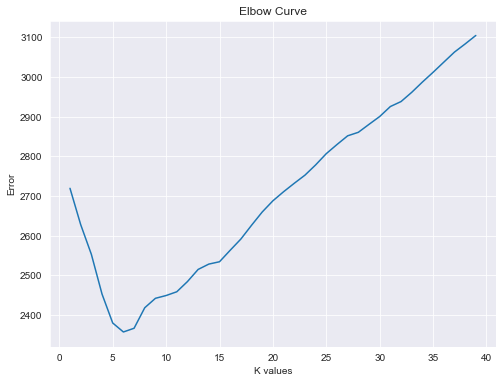

In [64]:
plt.figure(figsize=(8,6))
plt.plot(range(1,40), error_rate)
plt.title('Elbow Curve')
plt.xlabel('K values')
plt.ylabel('Error')

***From the Elbow Curve we can easily conclude that error is minimum at K=6***

In [65]:
knr = KNeighborsRegressor(n_neighbors=6)
knr.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=6)

In [66]:
y_pred = knr.predict(X_test)

In [67]:
mse = mean_squared_error(y_test,y_pred)
print('The Mean Squared error is : ', mse)
print('The Root Mean Squared error is : ', np.sqrt(mse))
print('The R2 Score is : ', r2_score(y_test,y_pred))

The Mean Squared error is :  2357.5565705569325
The Root Mean Squared error is :  48.554676093625964
The R2 Score is :  0.9734380110042083


***Therefore R2 score is 0.97 which is way better than Linear Regression***

In [68]:
r2_knr = r2_score(y_test,y_pred)

## MODEL COMPARISON

In [69]:
print('R2 score of Linear Regression is :', r2_lr)
print('R2 score of KNN Regressor is :', r2_knr)

R2 score of Linear Regression is : 0.8841710743970207
R2 score of KNN Regressor is : 0.9734380110042083


### THEREFORE IT CAN BE CONCLUDED THAT KNN REGRESSOR IS A BETTER CHOICE IN COMPARISON TO LINEAR REGRESSION